<a href="https://colab.research.google.com/github/syahdannoor/Disability_4/blob/Syahdan/152236035101_539_Syahdan_Noor_BISINDO_Alfabet_Disability_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2

from tensorflow import keras
from keras import layers
from keras.models import Sequential

# Datasets BISINDO

In [ ]:
data_dir = tf.keras.utils.get_file(
    'Citra BISINDO',
    #private
    '',
    #public
    #'https://media.githubusercontent.com/media/syahdannoor/Disability_4/main/dataset/Citra%20BISINDO.tgz',

    untar=True)

## posix

In [ ]:
import pathlib
data_dir = pathlib.Path('/root/.keras/datasets/Citra BISINDO')
data_dir

PosixPath('/root/.keras/datasets/Citra BISINDO')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

312


# Load data using Keras

In [ ]:
batch_size = 32
img_height = 448
img_width = 448

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 312 files belonging to 26 classes.
Using 250 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 312 files belonging to 26 classes.
Using 62 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Visualize data

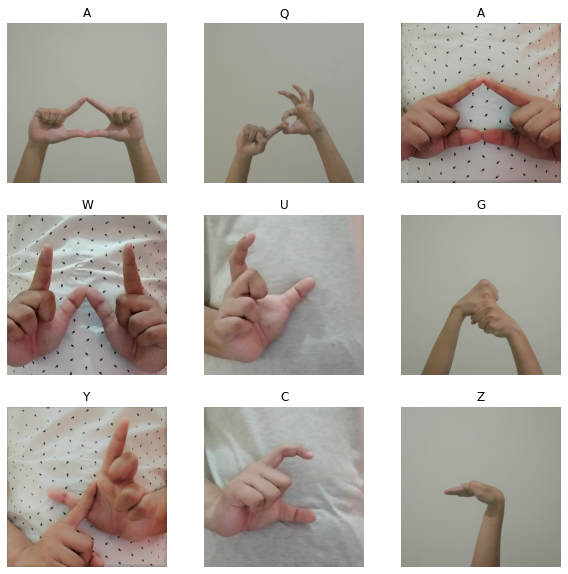

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 448, 448, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.72405225


# no augmentation

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 448, 448, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 448, 448, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 224, 224, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)     

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 8s 682ms/step - loss: 5.9998 - accuracy: 0.0360 - val_loss: 3.2729 - val_accuracy: 0.0161
Epoch 2/10
8/8 [==============================] - 2s 203ms/step - loss: 3.2672 - accuracy: 0.0360 - val_loss: 3.2520 - val_accuracy: 0.0645
Epoch 3/10
8/8 [==============================] - 2s 198ms/step - loss: 3.2532 - accuracy: 0.2120 - val_loss: 3.2548 - val_accuracy: 0.2097
Epoch 4/10
8/8 [==============================] - 2s 204ms/step - loss: 3.2047 - accuracy: 0.2640 - val_loss: 3.1726 - val_accuracy: 0.1452
Epoch 5/10
8/8 [==============================] - 2s 200ms/step - loss: 2.9378 - accuracy: 0.3280 - val_loss: 2.7383 - val_accuracy: 0.4677
Epoch 6/10
8/8 [==============================] - 2s 200ms/step - loss: 2.0822 - accuracy: 0.5200 - val_loss: 1.7778 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 2s 201ms/step - loss: 1.0158 - accuracy: 0.7080 - val_loss: 1.1548 - val_accuracy: 0.6613
Epoch 8/10
8/8 [====

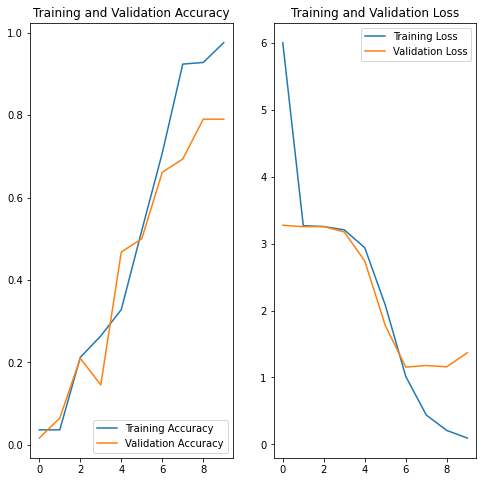

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(val_ds,train_ds)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

NameError: ignored

# with augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
  ]
)

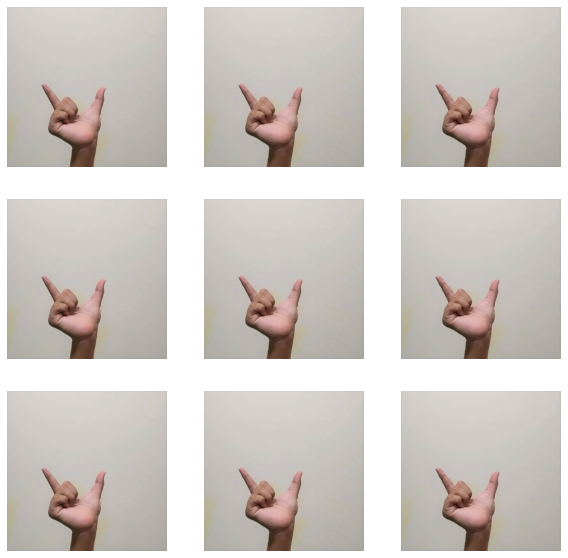

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 448, 448, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 448, 448, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 448, 448, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 224, 224, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                 

In [ ]:

epochstep = 8
epochs = 100
history = model.fit(
  train_ds,
  steps_per_epoch = epochstep,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
8/8 [==============================] - 2s 213ms/step - loss: 0.8298 - accuracy: 0.7520 - val_loss: 1.5886 - val_accuracy: 0.6129
Epoch 2/100
8/8 [==============================] - 2s 212ms/step - loss: 0.7869 - accuracy: 0.7560 - val_loss: 1.5505 - val_accuracy: 0.6774
Epoch 3/100
8/8 [==============================] - 2s 210ms/step - loss: 0.7285 - accuracy: 0.7960 - val_loss: 1.6277 - val_accuracy: 0.6774
Epoch 4/100
8/8 [==============================] - 2s 212ms/step - loss: 0.6867 - accuracy: 0.7720 - val_loss: 1.5939 - val_accuracy: 0.6452
Epoch 5/100
8/8 [==============================] - 2s 216ms/step - loss: 0.7201 - accuracy: 0.7760 - val_loss: 1.5752 - val_accuracy: 0.6613
Epoch 6/100
8/8 [==============================] - 2s 213ms/step - loss: 0.6721 - accuracy: 0.7720 - val_loss: 1.6127 - val_accuracy: 0.6613
Epoch 7/100
8/8 [==============================] - 2s 219ms/step - loss: 0.7955 - accuracy: 0.7360 - val_loss: 1.5931 - val_accuracy: 0.6935
Epoch 8/100
8

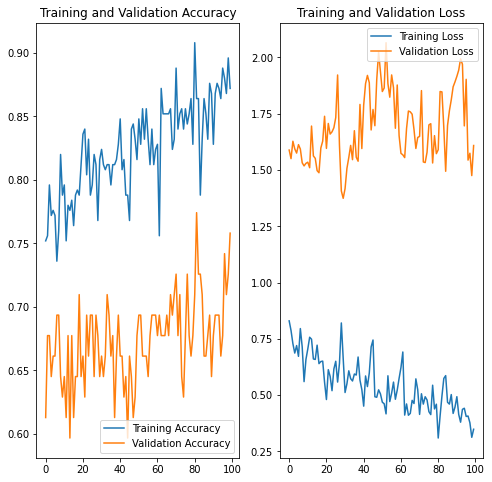

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# MODEL Prediction

Saving wall white (4).jpg to wall white (4).jpg
This image most likely belongs to Y 
With a 4.19 percent confidence.


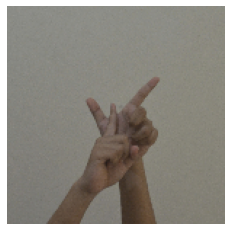

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = tf.keras.utils.load_img(path, target_size =(150,150))
  plt.axis('off')
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=10)
  score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} \nWith a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# model save

In [ ]:
model.save('/content/model_15072022.h5')